Melakukan import libraries yang dibutukan

In [28]:
import pandas as pd
import tensorflow as tf

In [29]:
data=pd.read_excel('./selenagomez_clean.xlsx')
del data['Unnamed: 0']
data

,created_at,username,text,preprocessed,sentiment
0,Thu Mar 02 23:59:30 +0000 2023,darkonsun,social media is a disease and this hailey bieb...,social media diseas hailey bieber selena gomez...,Neutral
1,Thu Mar 02 23:56:18 +0000 2023,babyyyannieee,Justin Bieber &amp; Selena Gomez followed each...,justin bieber amp selena gomez follow twitter ...,Neutral
2,Thu Mar 02 23:55:57 +0000 2023,likabeast101,Selena Gomez drove by my house 🙀,selena gomez drive hous,Neutral
3,Thu Mar 02 23:55:36 +0000 2023,whoismelanyway,I understand hailey Bieber because if my husba...,understand hailey bieber husband ex selena gom...,Neutral
4,Thu Mar 02 23:54:50 +0000 2023,_mayyraa,but then i always realize because SELENA GOMEZ...,alway realiz selena gomez alway look good,Positive
...,...,...,...,...,...
5201,Wed Mar 01 10:19:04 +0000 2023,SAFFAOnAirRadio,"@SAFFAOnAirRadio is now playing, Selena Gomez,...",saffaonairradio play selena gomez marshmello w...,Positive
5202,Wed Mar 01 10:19:01 +0000 2023,tshepiixx,Go follow Selena Gomez on IG 😡,go follow selena gomez ig,Neutral
5203,Wed Mar 01 10:17:59 +0000 2023,Chief_I_H8_U,@Ricius496 @endlessbonerz Selena Gomez has a m...,riciu endlessbonerz selena gomez medic issu st...,Neutral
5204,Wed Mar 01 10:15:42 +0000 2023,vinalraswati,I still can taste it and i hate it. \n\nPeople...,still tast hate peopl know selena gomez,Negative


In [30]:
data=data[['preprocessed','sentiment']]
data

,preprocessed,sentiment
0,social media diseas hailey bieber selena gomez...,Neutral
1,justin bieber amp selena gomez follow twitter ...,Neutral
2,selena gomez drive hous,Neutral
3,understand hailey bieber husband ex selena gom...,Neutral
4,alway realiz selena gomez alway look good,Positive
...,...,...
5201,saffaonairradio play selena gomez marshmello w...,Positive
5202,go follow selena gomez ig,Neutral
5203,riciu endlessbonerz selena gomez medic issu st...,Neutral
5204,still tast hate peopl know selena gomez,Negative


In [31]:
data.sentiment = pd.Categorical(pd.factorize(data.sentiment)[0])
data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14296\1650668707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sentiment = pd.Categorical(pd.factorize(data.sentiment)[0])


,preprocessed,sentiment
0,social media diseas hailey bieber selena gomez...,0
1,justin bieber amp selena gomez follow twitter ...,0
2,selena gomez drive hous,0
3,understand hailey bieber husband ex selena gom...,0
4,alway realiz selena gomez alway look good,1
...,...,...
5201,saffaonairradio play selena gomez marshmello w...,1
5202,go follow selena gomez ig,0
5203,riciu endlessbonerz selena gomez medic issu st...,0
5204,still tast hate peopl know selena gomez,2


In [32]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [33]:
#vectorizer = TfidfVectorizer()
##vectors = vectorizer.fit_transform(data['preprocessed'])
#feature_names = vectorizer.get_feature_names()
#dense = vectors.todense()
#denselist=dense.tolist()

In [34]:
max_len=15
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
tokenizer=Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(data['preprocessed'])

In [35]:
len(tokenizer.word_index)

6995

In [36]:
sequences=tokenizer.texts_to_sequences(data['preprocessed'])
padded=pad_sequences(sequences=sequences,padding=padding_type,truncating=trunc_type,maxlen=max_len)
temp=0
kamus={}
for item in sequences:
    coba=len(item)
    if coba not in kamus:
        kamus[coba]=1
    else:
        kamus[coba]+=1

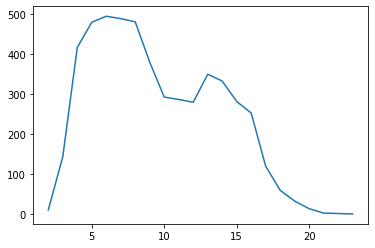

In [37]:
import matplotlib.pylab as plt

lists = sorted(kamus.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [38]:
sequences=tokenizer.texts_to_sequences(data['preprocessed'])
padded=pad_sequences(sequences=sequences,padding=padding_type,truncating=trunc_type,maxlen=max_len)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(padded,data['sentiment'],test_size=0.1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4685, 15), (521, 15), (4685,), (521,))

In [40]:
y_train= tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test= tf.keras.utils.to_categorical(y_test, num_classes=3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4685, 15), (521, 15), (4685, 3), (521, 3))

In [41]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [42]:
def createSimpleModel(activation):
    model=tf.keras.models.Sequential([
            tf.keras.layers.Embedding(len(tokenizer.word_index),16,input_length=max_len),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True,activation=activation['hidden'])),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(3, activation=activation['output'])
        ])
    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy',f1_m])
    model.summary()
    return model

In [43]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [44]:
#from scikeras.wrappers import KerasClassifier
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
##estimator = KerasClassifier(build_fn=createSimpleModel(2), epochs=20, verbose=1,callbacks=[callback],validation_split=0.1)
#kfold = KFold(n_splits=5, shuffle=True)
#results = cross_val_score(estimator, x_train, y_train, cv=kfold,scoring='accuracy')
#results

In [45]:
activation=[{'hidden':'relu','output':'sigmoid'},{'hidden':'relu','output':'softmax',},
            {'hidden':'sigmoid','output':'sigmoid'},{'hidden':'sigmoid','output':'softmax'},
            {'hidden':'tanh','output':'sigmoid'},{'hidden':'tanh','output':'softmax'}]
result=[]
models=[]
for item in activation:
    print(item)
    model=createSimpleModel(activation=item)
    history=model.fit(x_train,y_train,epochs=20,validation_split=0.1,callbacks=[callback])
    models.append(model)
    result.append(history)

{'hidden': 'relu', 'output': 'sigmoid'}
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 15, 16)            111920    
                                                                 
 bidirectional_6 (Bidirectio  (None, 15, 128)          41472     
 nal)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1920)              0         
                                                                 
 dense_6 (Dense)             (None, 3)                 5763      
                                                                 
Total params: 159,155
Trainable params: 159,155
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
132/132 [==============================] - 16s 103ms/step - los

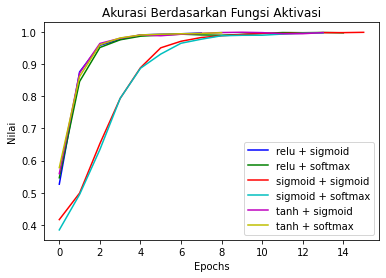

<Figure size 14400x14400 with 0 Axes>

In [46]:
def compareAccuracy(result,activation):
    plt.plot(result[0].history['accuracy'],color='b',label='{} + {}'.format(activation[0]['hidden'],activation[0]['output']))
    plt.plot(result[1].history['accuracy'],color='g',label='{} + {}'.format(activation[1]['hidden'],activation[1]['output']))
    plt.plot(result[2].history['accuracy'],color='r',label='{} + {}'.format(activation[2]['hidden'],activation[2]['output']))
    plt.plot(result[3].history['accuracy'],color='c',label='{} + {}'.format(activation[3]['hidden'],activation[3]['output']))
    plt.plot(result[4].history['accuracy'],color='m',label='{} + {}'.format(activation[4]['hidden'],activation[4]['output']))
    plt.plot(result[5].history['accuracy'],color='y',label='{} + {}'.format(activation[5]['hidden'],activation[5]['output']))
    plt.xlabel("Epochs")
    plt.ylabel("Nilai")
    plt.title("Akurasi Berdasarkan Fungsi Aktivasi")
    plt.legend()
    plt.figure(figsize=(200 ,200))
    plt.show()
compareAccuracy(result,activation)
def compareValidationAccuracy(result,activation):
    plt.plot(result[0].history['val_accuracy'],color='b',label='{} + {}'.format(activation[0]['hidden'],activation[0]['output']))
    plt.plot(result[1].history['val_accuracy'],color='g',label='{} + {}'.format(activation[1]['hidden'],activation[1]['output']))
    plt.plot(result[2].history['val_accuracy'],color='r',label='{} + {}'.format(activation[2]['hidden'],activation[2]['output']))
    plt.plot(result[3].history['val_accuracy'],color='c',label='{} + {}'.format(activation[3]['hidden'],activation[3]['output']))
    plt.plot(result[4].history['val_accuracy'],color='m',label='{} + {}'.format(activation[4]['hidden'],activation[4]['output']))
    plt.plot(result[5].history['val_accuracy'],color='y',label='{} + {}'.format(activation[5]['hidden'],activation[5]['output']))
    plt.xlabel("Epochs")
    plt.ylabel("Nilai")
    plt.title("Validasi Akurasi Berdasarkan Fungsi Aktivasi")
    plt.legend()
    plt.figure(figsize=(200 ,200))
    plt.show()
compareValidationAccuracy(result,activation)

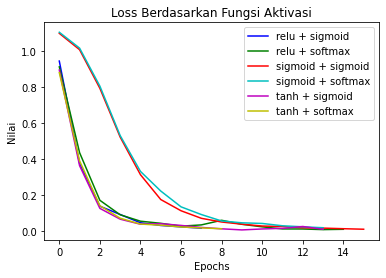

<Figure size 14400x14400 with 0 Axes>

In [48]:
def compareLoss(result,activation):
    plt.plot(result[0].history['loss'],color='b',label='{} + {}'.format(activation[0]['hidden'],activation[0]['output']))
    plt.plot(result[1].history['loss'],color='g',label='{} + {}'.format(activation[1]['hidden'],activation[1]['output']))
    plt.plot(result[2].history['loss'],color='r',label='{} + {}'.format(activation[2]['hidden'],activation[2]['output']))
    plt.plot(result[3].history['loss'],color='c',label='{} + {}'.format(activation[3]['hidden'],activation[3]['output']))
    plt.plot(result[4].history['loss'],color='m',label='{} + {}'.format(activation[4]['hidden'],activation[4]['output']))
    plt.plot(result[5].history['loss'],color='y',label='{} + {}'.format(activation[5]['hidden'],activation[5]['output']))
    plt.xlabel("Epochs")
    plt.ylabel("Nilai")
    plt.title("Loss Berdasarkan Fungsi Aktivasi")
    plt.legend()
    plt.figure(figsize=(200 ,200))
    plt.show()
compareLoss(result,activation)
def compareValidationLoss(result,activation):
    plt.plot(result[0].history['val_loss'],color='b',label='{} + {}'.format(activation[0]['hidden'],activation[0]['output']))
    plt.plot(result[1].history['val_loss'],color='g',label='{} + {}'.format(activation[1]['hidden'],activation[1]['output']))
    plt.plot(result[2].history['val_loss'],color='r',label='{} + {}'.format(activation[2]['hidden'],activation[2]['output']))
    plt.plot(result[3].history['val_loss'],color='c',label='{} + {}'.format(activation[3]['hidden'],activation[3]['output']))
    plt.plot(result[4].history['val_loss'],color='m',label='{} + {}'.format(activation[4]['hidden'],activation[4]['output']))
    plt.plot(result[5].history['val_loss'],color='y',label='{} + {}'.format(activation[5]['hidden'],activation[5]['output']))
    plt.xlabel("Epochs")
    plt.ylabel("Nilai")
    plt.title("Validasi Loss Berdasarkan Fungsi Aktivasi")
    plt.legend()
    plt.figure(figsize=(200 ,200))
    plt.show()
compareValidationLoss(result,activation)

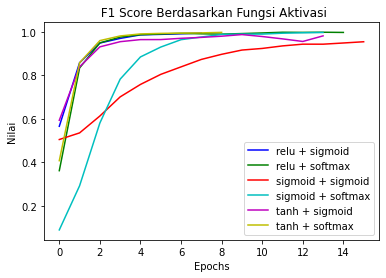

<Figure size 14400x14400 with 0 Axes>

In [50]:
def compareF1Score(result,activation):
    plt.plot(result[0].history['f1_m'],color='b',label='{} + {}'.format(activation[0]['hidden'],activation[0]['output']))
    plt.plot(result[1].history['f1_m'],color='g',label='{} + {}'.format(activation[1]['hidden'],activation[1]['output']))
    plt.plot(result[2].history['f1_m'],color='r',label='{} + {}'.format(activation[2]['hidden'],activation[2]['output']))
    plt.plot(result[3].history['f1_m'],color='c',label='{} + {}'.format(activation[3]['hidden'],activation[3]['output']))
    plt.plot(result[4].history['f1_m'],color='m',label='{} + {}'.format(activation[4]['hidden'],activation[4]['output']))
    plt.plot(result[5].history['f1_m'],color='y',label='{} + {}'.format(activation[5]['hidden'],activation[5]['output']))
    plt.xlabel("Epochs")
    plt.ylabel("Nilai")
    plt.title(" F1 Score Berdasarkan Fungsi Aktivasi")
    plt.legend()
    plt.figure(figsize=(200 ,200))
    plt.show()
compareF1Score(result,activation)
def compareValidationF1Score(result,activation):
    plt.plot(result[0].history['val_f1_m'],color='b',label='{} + {}'.format(activation[0]['hidden'],activation[0]['output']))
    plt.plot(result[1].history['val_f1_m'],color='g',label='{} + {}'.format(activation[1]['hidden'],activation[1]['output']))
    plt.plot(result[2].history['val_f1_m'],color='r',label='{} + {}'.format(activation[2]['hidden'],activation[2]['output']))
    plt.plot(result[3].history['val_f1_m'],color='c',label='{} + {}'.format(activation[3]['hidden'],activation[3]['output']))
    plt.plot(result[4].history['val_f1_m'],color='m',label='{} + {}'.format(activation[4]['hidden'],activation[4]['output']))
    plt.plot(result[5].history['val_f1_m'],color='y',label='{} + {}'.format(activation[5]['hidden'],activation[5]['output']))
    plt.xlabel("Epochs")
    plt.ylabel("Nilai")
    plt.title(" Validasi F1 Score Berdasarkan Fungsi Aktivasi")
    plt.legend()
    plt.figure(figsize=(200 ,200))
    plt.show()
compareValidationF1Score(result,activation)

In [52]:
for i in range(6):
    temp=models[i].evaluate(x_test,y_test)
    print("Model dengan hidden layer {} dan output layer {} dengan matrix evaluasi".format(activation[i]['hidden'],activation[i]['output']),temp)

17/17 [==============================] - 0s 22ms/step - loss: 0.6094 - accuracy: 0.8772 - f1_m: 0.8680
Model dengan hidden layer relu dan output layer sigmoid dengan matrix evaluasi [0.6094195246696472, 0.8771592974662781, 0.8680157661437988]
17/17 [==============================] - 0s 21ms/step - loss: 0.5539 - accuracy: 0.8637 - f1_m: 0.8696
Model dengan hidden layer relu dan output layer softmax dengan matrix evaluasi [0.5538613200187683, 0.863723635673523, 0.8695597052574158]
17/17 [==============================] - 0s 16ms/step - loss: 0.6183 - accuracy: 0.8273 - f1_m: 0.7859
Model dengan hidden layer sigmoid dan output layer sigmoid dengan matrix evaluasi [0.6183249950408936, 0.8272552490234375, 0.7859273552894592]
17/17 [==============================] - 0s 13ms/step - loss: 0.6177 - accuracy: 0.8311 - f1_m: 0.8398
Model dengan hidden layer sigmoid dan output layer softmax dengan matrix evaluasi [0.6176862120628357, 0.8310940265655518, 0.8398400545120239]
17/17 [================

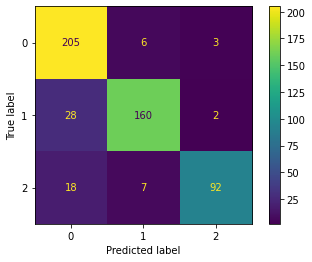

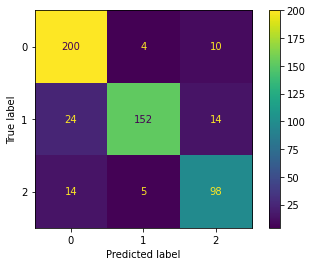

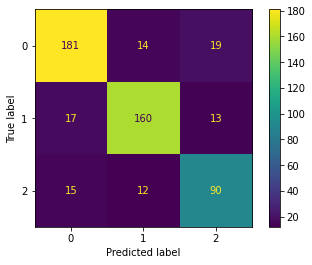

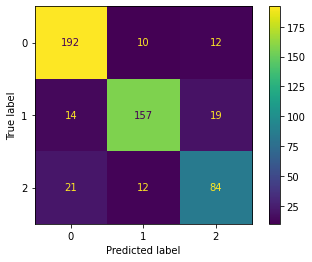

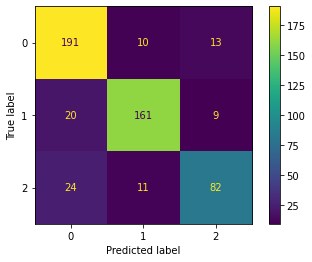

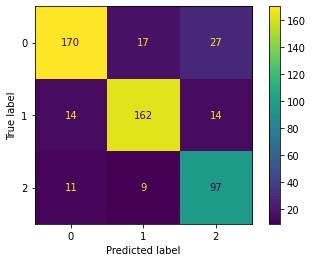

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
for item in models:
    predict=item.predict(x_test)
    confusion=confusion_matrix(np.argmax(y_test,axis=1),np.argmax(predict,axis=1))
    display=ConfusionMatrixDisplay(confusion_matrix=confusion)
    display.plot()

In [54]:
model=createSimpleModel(1)
history=model.fit(x_train,y_train,epochs=20,validation_split=0.1,callbacks=[callback])

TypeError: 'int' object is not subscriptable

In [ ]:
temp=model.evaluate(x_test,y_test)
temp

17/17 [==============================] - 0s 11ms/step - loss: 0.1171 - accuracy: 0.8100 - f1_m: 0.8079


[0.11711768805980682, 0.8099808096885681, 0.8078767657279968]

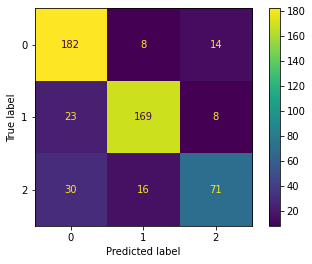

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
predict=model.predict(x_test)
confusion=confusion_matrix(np.argmax(y_test,axis=1),np.argmax(predict,axis=1))
display=ConfusionMatrixDisplay(confusion_matrix=confusion)
display.plot()

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history):
  figure, axis = plt.subplots(2, 2)
  figure.set_size_inches(18.5, 10.5, forward=True)

  axis[0,0].plot(history.history['accuracy'])
  axis[0,0].plot(history.history['val_accuracy'])
  axis[0,0].set_title('Accuracy')
  axis[0,0].legend(['accuracy','val_accuracy'])

  axis[0,1].plot(history.history['loss'])
  axis[0,1].plot(history.history['val_loss'])
  axis[0,1].set_title('Loss')
  axis[0,1].legend(['loss','val_loss'])

  axis[1,0].plot(history.history['f1_m'])
  axis[1,0].plot(history.history['val_f1_m'])
  axis[1,0].set_title('F1-Score')
  axis[1,0].legend(['f1_m','val_f1_m'])
  plt.show()

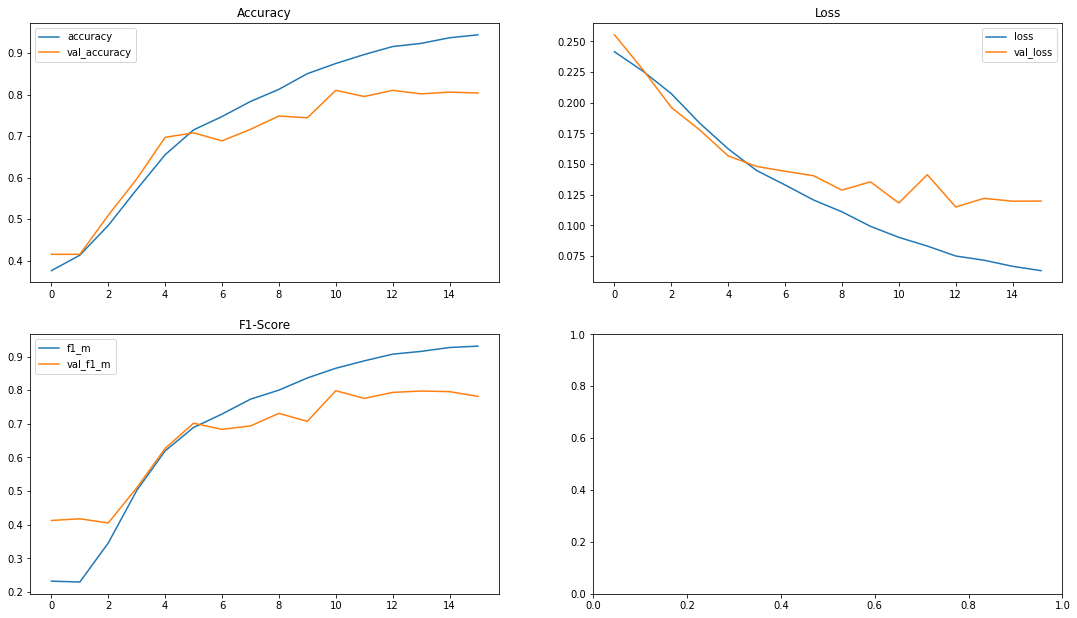

In [ ]:
plot_graphs(history=history)

In [ ]:
def createComplexModel(skenario):
    if skenario ==1:
        model=tf.keras.models.Sequential([
            tf.keras.layers.Embedding(len(tokenizer.word_index),128,input_length=max_len),
            tf.keras.layers.LSTM(128,return_sequences=True,activation='tanh',dropout=0.2),
            tf.keras.layers.LSTM(128,return_sequences=True,activation='tanh',dropout=0.2),
            tf.keras.layers.LSTM(128,return_sequences=True,activation='tanh',dropout=0.2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512,activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(3, activation='softmax')
        ])
        model.compile(loss='mse',optimizer=tf.keras.optimizers.RMSprop(),metrics=['accuracy',f1_m])
    else:
        model=tf.keras.models.Sequential([
        tf.keras.layers.Embedding(len(tokenizer.word_index),128,input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True,activation='tanh',dropout=0.2)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True,activation='tanh',dropout=0.2)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True,activation='tanh',dropout=0.2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3,activation='softmax')
        ])
        model.compile(loss='mse',optimizer=tf.keras.optimizers.RMSprop(),metrics=['accuracy',f1_m])
    model.summary()
    return model


In [ ]:
model=createComplexModel(2)
history=model.fit(x_train,y_train,epochs=20,validation_split=0.1,callbacks=[callback])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 15, 128)           895360    
                                                                 
 bidirectional_12 (Bidirecti  (None, 15, 256)          263168    
 onal)                                                           
                                                                 
 bidirectional_13 (Bidirecti  (None, 15, 256)          394240    
 onal)                                                           
                                                                 
 bidirectional_14 (Bidirecti  (None, 15, 256)          394240    
 onal)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 3840)              0         
                                                     

In [ ]:
temp=model.evaluate(x_test,y_test)
temp

17/17 [==============================] - 1s 32ms/step - loss: 0.5319 - accuracy: 0.8580 - f1_m: 0.8578


[0.5319363474845886, 0.8579654693603516, 0.8578073382377625]

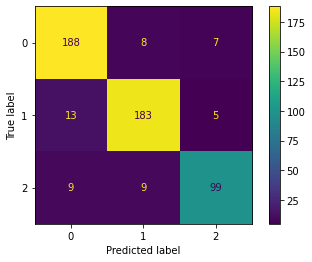

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
predict=model.predict(x_test)
confusion=confusion_matrix(np.argmax(y_test,axis=1),np.argmax(predict,axis=1))
display=ConfusionMatrixDisplay(confusion_matrix=confusion)
display.plot()

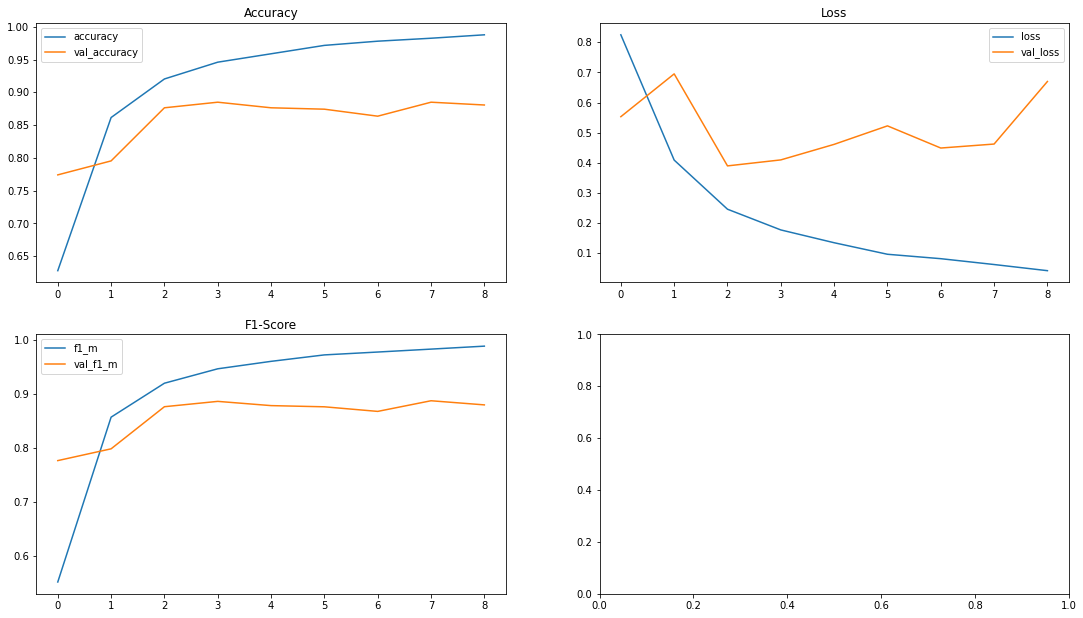

In [ ]:
plot_graphs(history=history)